## Kernel trick

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
Na = 20
class_A = [ np.random.uniform(0, 1) * np.array([np.cos(a), np.sin(a)]) 
           for a in np.random.uniform(-np.pi, np.pi, size=Na) ]

Nb = 20
class_B = [ np.random.uniform(2, 3) * np.array([np.cos(a), np.sin(a)]) 
           for a in np.random.uniform(-np.pi, np.pi, size=Nb) ]

In [3]:
def show(X1,X2, clf):
    plt.figure(figsize=(6,6))
    plt.style.use('dark_background')
    plt.axis('equal')
    
    x1,y1 = zip(*X1)
    x2,y2 = zip(*X2)
    plt.scatter(x=x1,y=y1,c='cyan')
    plt.scatter(x=x2,y=y2,c='yellow')
    
    if clf==None:
        return
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    eps = 0.5
    ax.contour(XX, YY, Z, colors='white', levels=[-eps, 0, eps], alpha=0.7,
               linestyles=['--', '-', '--'])

    plt.axis('equal')
    plt.show()

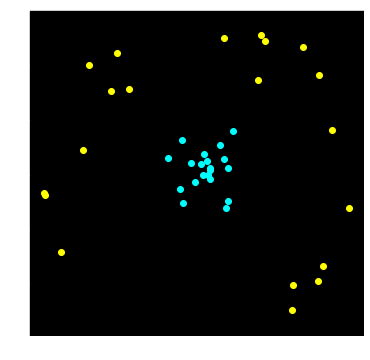

In [4]:
# plt.figure(figsize=(6,6))
# plt.style.use('dark_background')
# plt.axis('equal')

# x,y = zip(*class_A)
# plt.scatter(x, y, c='yellow')

# x,y = zip(*class_B)
# plt.scatter(x, y, c='cyan')

# plt.show()
show(class_A, class_B, None)

In [5]:
cla = SVC(kernel='linear')
X = np.vstack([class_A, class_B])

In [6]:
Y = [0]*Na + [1]*Nb

In [7]:
cla.fit(X,Y)

SVC(kernel='linear')

In [8]:
cla.score(X,Y)

0.75

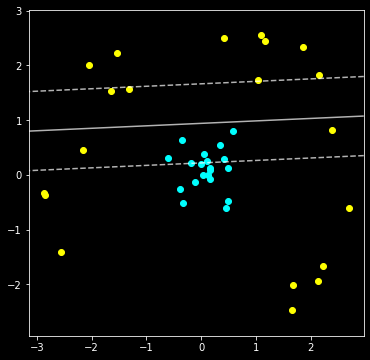

In [9]:
show(class_A, class_B, cla)

In [10]:
X1 = np.hstack([X, np.array([np.array([x.dot(x)]) for x in X])])
X1[:5]

array([[ 0.12466593, -0.00978266,  0.01563729],
       [ 0.45380722, -0.60710726,  0.57452022],
       [-0.34539767,  0.63605587,  0.52386661],
       [-0.39137567, -0.25622335,  0.21882532],
       [ 0.16652391,  0.11831908,  0.04172962]])

In [11]:
cla.fit(X1, Y)

SVC(kernel='linear')

In [12]:
cla.score(X1, Y)

1.0

In [13]:
cla = SVC(kernel='rbf')
cla.fit(X, Y)
cla.score(X,Y)

1.0

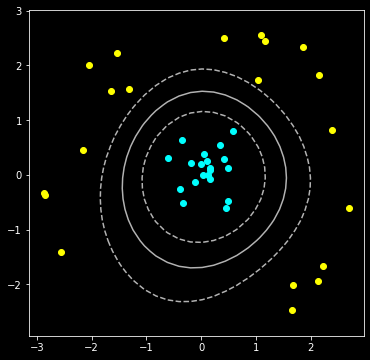

In [14]:
show(class_A, class_B, cla)